## Sentiment Analysis on  Book LibrarySystem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("C:\\Users\\tekal\\Downloads\\Project Code\\Final Sentimetal Analysis Of Book Recommendation System\\Book_ratingSample Data.csv")

In [2]:
df.head()

,User-ID,ISBN,Book-Rating,Book_Sentiment
0,276725,034545104X,0,Negative
1,155061224,155061224,5,Neutral
2,276727,446520802,0,Negative
3,276729,052165615X,3,Negative
4,276729,521795028,6,Positive


In [3]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book_Sentiment'], dtype='object')

In [4]:
rating_df = df[['Book-Rating','Book_Sentiment']]
print(rating_df.shape)
rating_df.head(5)

(49, 2)


,Book-Rating,Book_Sentiment
0,0,Negative
1,5,Neutral
2,0,Negative
3,3,Negative
4,6,Positive


In [5]:
rating_df = rating_df[rating_df['Book_Sentiment'] != 'neutral']
print(rating_df.shape)
rating_df.head(5)

(49, 2)


,Book-Rating,Book_Sentiment
0,0,Negative
1,5,Neutral
2,0,Negative
3,3,Negative
4,6,Positive


In [6]:
rating_df["Book_Sentiment"].value_counts()

Negative    31
Positive    15
Neutral      3
Name: Book_Sentiment, dtype: int64

In [7]:
sentiment_label = rating_df.Book_Sentiment.factorize()
sentiment_label

(array([0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2,
        0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0], dtype=int64),
 Index(['Negative', 'Neutral', 'Positive'], dtype='object'))

In [8]:
rating = rating_df.Book_Sentiment.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(rating)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(rating)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [9]:
print(tokenizer.word_index)

{'negative': 1, 'positive': 2, 'neutral': 3}


In [10]:
print(rating[0])
print(encoded_docs[0])

Negative
[1]


In [11]:
print(padded_sequence[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [12]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           128       
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 16,779
Trainable params: 16,779
Non-trainable params: 0
____________________________________________________

In [13]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
2/2 [==============================] - 5s 816ms/step - loss: 0.6905 - accuracy: 0.2821 - val_loss: 0.6984 - val_accuracy: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 0s 225ms/step - loss: 0.6730 - accuracy: 0.1282 - val_loss: 0.7064 - val_accuracy: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 0s 209ms/step - loss: 0.6560 - accuracy: 0.0769 - val_loss: 0.7141 - val_accuracy: 0.0000e+00
Epoch 4/5
2/2 [==============================] - 0s 228ms/step - loss: 0.6506 - accuracy: 0.0769 - val_loss: 0.7260 - val_accuracy: 0.0000e+00
Epoch 5/5
2/2 [==============================] - 0s 218ms/step - loss: 0.6345 - accuracy: 0.0769 - val_loss: 0.7438 - val_accuracy: 0.0000e+00


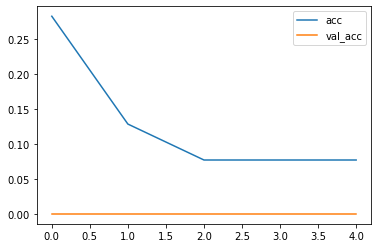

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

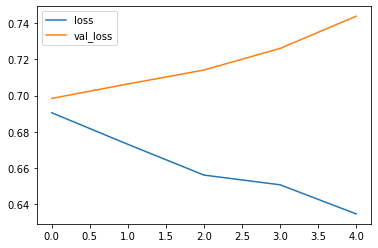

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [16]:
def predict_sentiment(rating):
    tw = tokenizer.texts_to_sequences([rating])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [20]:
test_sentence1 = "Harry Potter and the Chamber of Secrets Postcard Book "
predict_sentiment(test_sentence1)

test_sentence2 = "Fast Food Nation: The Dark Side of the All-American Meal"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 71ms/step
Predicted label:  Neutral
1/1 [==============================] - 0s 62ms/step
Predicted label:  Neutral
